# Cloning Repository Code

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/Soumik-Roy/D4-and-Variations.git

Cloning into 'D4-and-Variations'...
remote: Enumerating objects: 113, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 113 (delta 14), reused 24 (delta 8), pack-reused 80
Receiving objects: 100% (113/113), 86.73 MiB | 32.95 MiB/s, done.
Resolving deltas: 100% (16/16), done.


In [ ]:
!cp -a D4-and-Variations/. ./

In [ ]:
!rm -r D4-and-Variations/

# Downloading Dataset

In [ ]:
!mkdir dataset_downloads

In [ ]:
import gdown
gdown.download(id="1-4AaYMJtZ8CW1c0s-TP5q9A_iUE2rG9B", output="/content/dataset_downloads/sots.zip", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1-4AaYMJtZ8CW1c0s-TP5q9A_iUE2rG9B
To: /content/dataset_downloads/sots.zip
100%|██████████| 435M/435M [00:06<00:00, 64.5MB/s]


'/content/dataset_downloads/sots.zip'

In [ ]:
!mkdir dataset_downloads/train_data

In [ ]:
!unzip /content/dataset_downloads/sots.zip -d dataset_downloads/train_data

Archive:  /content/dataset_downloads/sots.zip
   creating: dataset_downloads/train_data/SOTS/
   creating: dataset_downloads/train_data/SOTS/indoor/
   creating: dataset_downloads/train_data/SOTS/indoor/gt/
 extracting: dataset_downloads/train_data/SOTS/indoor/gt/1400.png  
 extracting: dataset_downloads/train_data/SOTS/indoor/gt/1401.png  
 extracting: dataset_downloads/train_data/SOTS/indoor/gt/1402.png  
 extracting: dataset_downloads/train_data/SOTS/indoor/gt/1403.png  
 extracting: dataset_downloads/train_data/SOTS/indoor/gt/1404.png  
 extracting: dataset_downloads/train_data/SOTS/indoor/gt/1405.png  
 extracting: dataset_downloads/train_data/SOTS/indoor/gt/1406.png  
 extracting: dataset_downloads/train_data/SOTS/indoor/gt/1407.png  
 extracting: dataset_downloads/train_data/SOTS/indoor/gt/1408.png  
 extracting: dataset_downloads/train_data/SOTS/indoor/gt/1409.png  
 extracting: dataset_downloads/train_data/SOTS/indoor/gt/1410.png  
 extracting: dataset_downloads/train_data/SOT

> training dataset

In [ ]:
!python scripts/flist.py --path /content/dataset_downloads/train_data/SOTS/indoor/hazy --output ./datasets/its_train_hazy.flist
!python scripts/flist.py --path /content/dataset_downloads/train_data/SOTS/indoor/gt --output ./datasets/its_train_gt.flist

loading /content/dataset_downloads/train_data/SOTS/indoor/hazy
loading /content/dataset_downloads/train_data/SOTS/indoor/gt


> testing dataset

In [ ]:
!python scripts/flist.py --path /content/dataset_downloads/train_data/SOTS/outdoor/hazy --output ./datasets/sots_test_hazy_indoor.flist

loading /content/dataset_downloads/train_data/SOTS/outdoor/hazy


# Training

In [ ]:
!pip install kornia

In [ ]:
!python train.py --model 1 --checkpoints ./checkpoints/train_example

/usr/local/lib/python3.10/dist-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/rwightman/gen-efficientnet-pytorch/zipball/master" to /root/.cache/torch/hub/master.zip
Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/tf_efficientnet_lite3-b733e338.pth" to /root/.cache/torch/hub/checkpoints/tf_efficientnet_lite3-b733e338.pth
Using cache found in /root/.c

In [ ]:
!zip -r /content/checkpoints/train_example/train_results.zip /content/checkpoints/train_example/

In [ ]:
# from google.colab import files
# files.download('/content/checkpoints/train_example/train_results.zip') 

### Metric Curves across epochs

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('/content/checkpoints/train_example/log_reconstruct.dat')

epochs = data[:, 1]
psnrs = data[:, -2]
maes = data[:, -1]


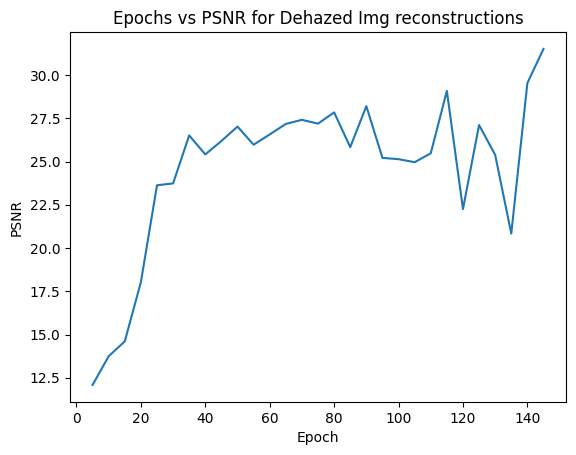

In [ ]:
plt.plot(epochs, psnrs)
plt.xlabel('Epoch')
plt.ylabel('PSNR')
plt.title('Epochs vs PSNR for Dehazed Img reconstructions')
plt.show()

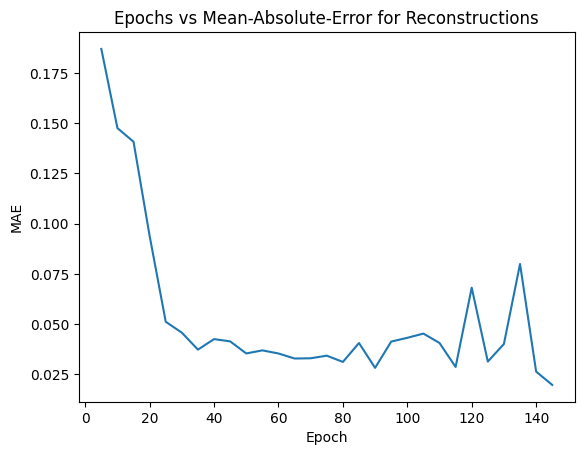

In [ ]:
plt.plot(epochs, maes)
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Epochs vs Mean-Absolute-Error for Reconstructions')
plt.show()

# Testing and Reproducting results

In [ ]:
training_done = False

In [ ]:
!cp /content/checkpoints/train_example/weights_reconstruct.pth ./checkpoints/test_example/weights_reconstruct.pth
!cp /content/checkpoints/train_example/optimizer_reconstruct.pth ./checkpoints/test_example/optimizer_reconstruct.pth
!cp /content/checkpoints/train_example/weights_reconstruct_dis.pth ./checkpoints/test_example/weights_reconstruct_dis.pth

training_done = True

> Pretrained Model

In [ ]:
import urllib.request

urllib.request.urlretrieve("https://drive.google.com/u/1/uc?id=1KLvPdNpskdVDSz0qEIP_tn-j2MwTcJAV&export=download", "./checkpoints/test_example/weights_reconstruct.pth")

('./checkpoints/test_example/weights_reconstruct.pth',
 <http.client.HTTPMessage at 0x7f0d24140220>)

In [ ]:
!python test.py --model 1 --checkpoints ./checkpoints/test_example

Using cache found in /root/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master
Using cache found in /root/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master
[]
Loading reconstruct weights...
Loading reconstruct complete! weights...

start testing...

3
PSNR_RGB: tensor(19.9343, device='cuda:0')
3
PSNR_RGB: tensor(15.8012, device='cuda:0')
11
PSNR_RGB: tensor(17.8419, device='cuda:0')
3
PSNR_RGB: tensor(22.3718, device='cuda:0')
3
PSNR_RGB: tensor(19.2019, device='cuda:0')
28
PSNR_RGB: tensor(22.6648, device='cuda:0')
3
PSNR_RGB: tensor(22.0909, device='cuda:0')
3
PSNR_RGB: tensor(23.8396, device='cuda:0')
3
PSNR_RGB: tensor(21.4738, device='cuda:0')
3
PSNR_RGB: tensor(18.3170, device='cuda:0')
3
PSNR_RGB: tensor(16.1316, device='cuda:0')
29
PSNR_RGB: tensor(23.7504, device='cuda:0')
7
PSNR_RGB: tensor(22.9343, device='cuda:0')
3
PSNR_RGB: tensor(17.5466, device='cuda:0')
3
PSNR_RGB: tensor(16.5190, device='cuda:0')
3
PSNR_RGB: tensor(14.0626, device='cuda:0')
3
PSNR_RGB:

In [ ]:
!zip -r /content/checkpoints/test_example/test_results.zip /content/checkpoints/test_example/results/reconstruct/

In [ ]:
# from google.colab import files
# files.download('/content/checkpoints/test_example/test_results.zip') 

### Performance

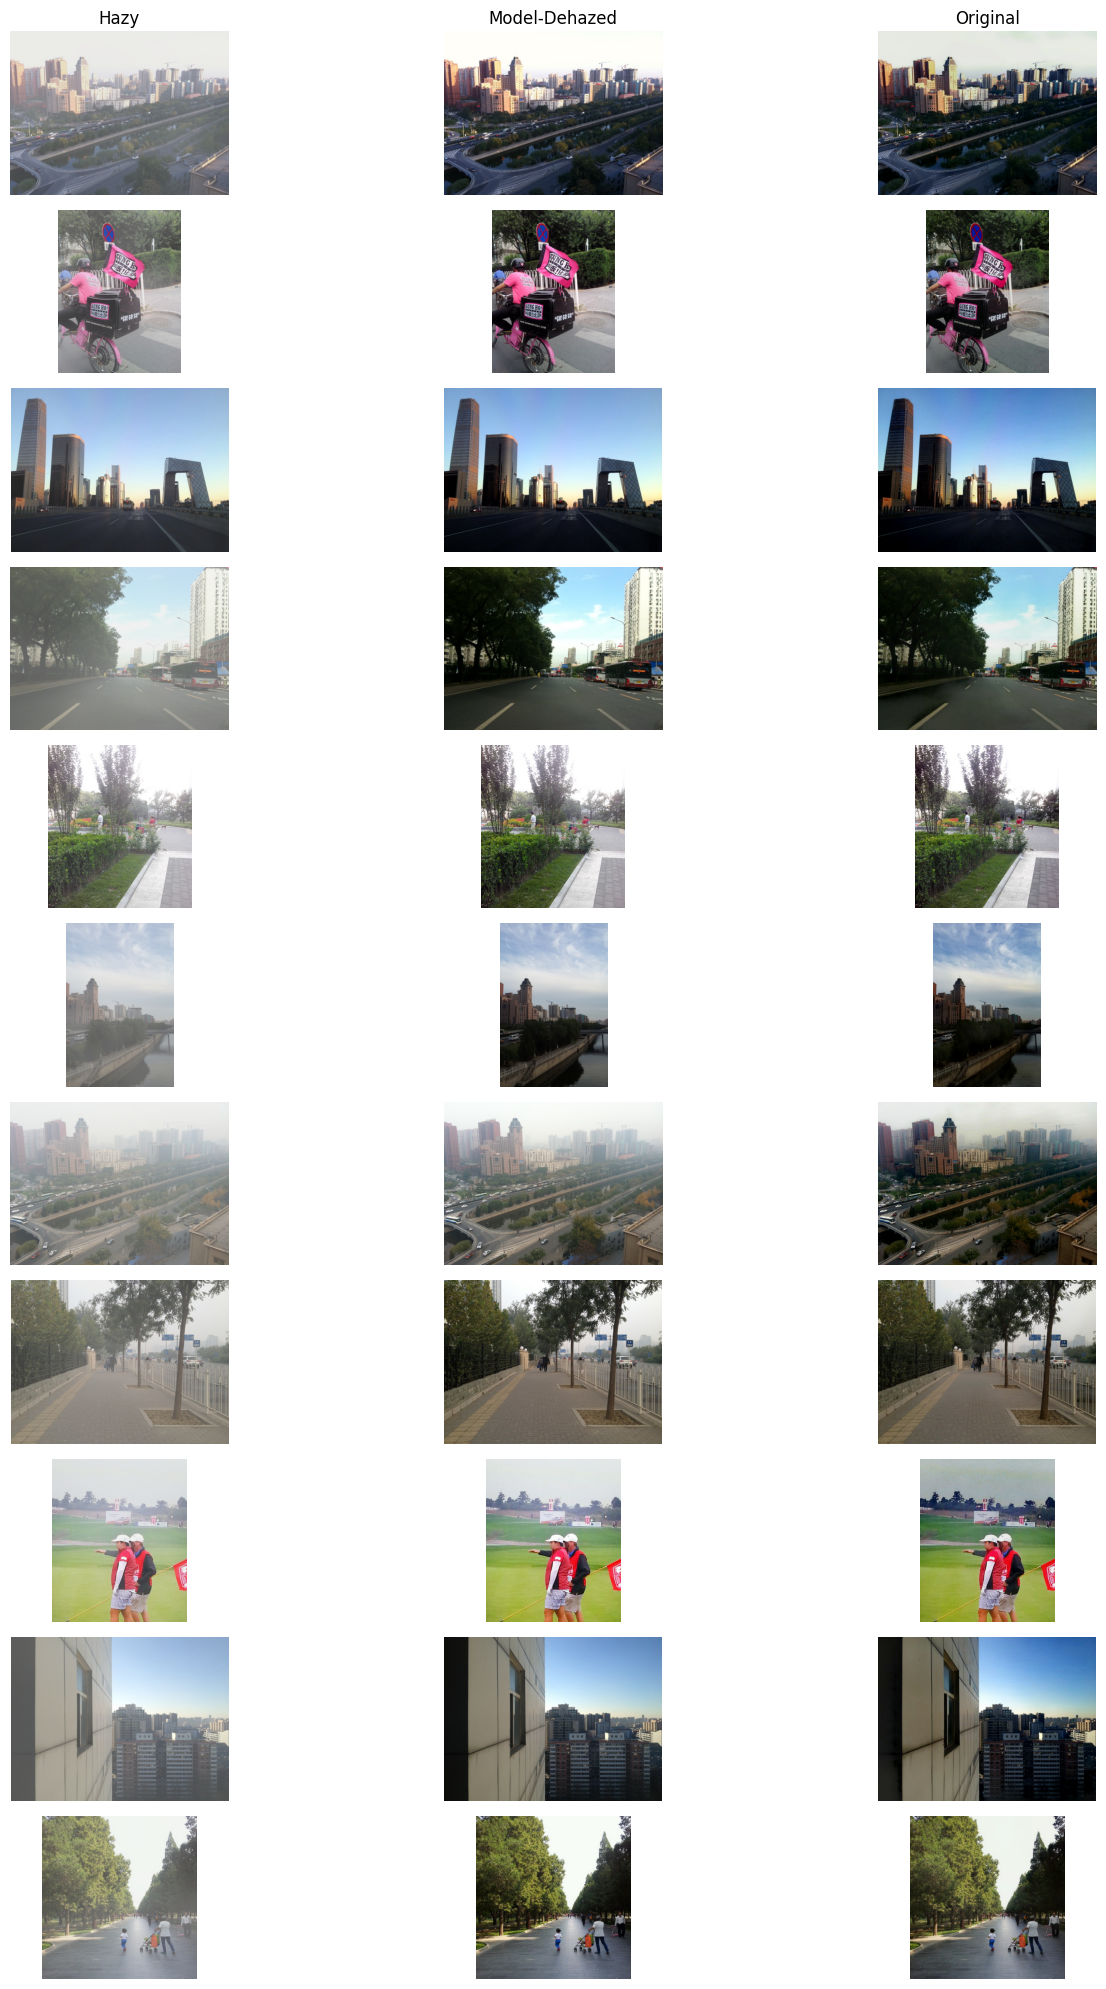

In [ ]:
import os
import matplotlib.pyplot as plt

hazy_dir = '/content/dataset_downloads/train_data/SOTS/outdoor/hazy'
original_dir = '/content/dataset_downloads/train_data/SOTS/outdoor/gt'
predicted_dir = '/content/checkpoints/test_example/results/reconstruct'


hazy_files = os.listdir(hazy_dir)
hazy_paths = {}
for file in hazy_files:
    if file.endswith('.png') or file.endswith('.jpg'):
        key = file.split('_')[0]
        hazy_paths[key] = os.path.join(hazy_dir, file)


original_files = os.listdir(original_dir)
original_paths = {}
for file in original_files:
    if file.endswith('.png') or file.endswith('.jpg'):
        key = file.split('.')[0]
        original_paths[key] = os.path.join(original_dir, file)


predicted_files = os.listdir(predicted_dir)
predicted_paths = {}
for file in predicted_files:
    if file.endswith('.png') or file.endswith('.jpg'):
        key = file.split('_')[0]
        predicted_paths[key] = os.path.join(predicted_dir, file)

num_rows = 10
fig, axs = plt.subplots(num_rows+1, 3, figsize=(15, 20))

for i, key in enumerate(original_paths.keys()):
    hazy_img = plt.imread(hazy_paths[key])
    original_img = plt.imread(original_paths[key])
    predicted_img = plt.imread(predicted_paths[key])
    
    
    axs[i, 0].imshow(hazy_img)
    axs[i, 0].axis('off')

    axs[i, 1].imshow(original_img)
    axs[i, 1].axis('off')
    
    axs[i, 2].imshow(predicted_img)
    axs[i, 2].axis('off')
    if(i==num_rows):
        break

axs[0, 0].set_title("Hazy")
axs[0, 1].set_title("Model-Dehazed")
axs[0, 2].set_title('Original')

fig.tight_layout()
plt.show()


# Part 2 : Using the methodology for Image DeNoising

## Creating Dataset

In [ ]:
import os
import numpy as np
from PIL import Image
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from tqdm.notebook import tqdm

orig_folder = '/content/dataset_downloads/new_methodology/cifar10_orig'
gray_folder = '/content/dataset_downloads/new_methodology/cifar10_gray'

if not os.path.exists(orig_folder):
    os.makedirs(orig_folder)
    os.makedirs(orig_folder+'/train')
    os.makedirs(orig_folder+'/test')
if not os.path.exists(gray_folder):
    os.makedirs(gray_folder)
    os.makedirs(gray_folder+'/train')
    os.makedirs(gray_folder+'/test')

pil_transform = transforms.Compose([transforms.ToPILImage()])
resizer = transforms.Compose([transforms.ToTensor(), transforms.Resize((512, 512))])

def add_saltNpepper_noise(input, weight = 0.25):
    input = transforms.ToTensor()(input)
    size_noise = 3*512*512
    count_2 = int(weight/2 * size_noise)
    noise = np.array(
        [-1]*count_2 + [0]*(size_noise - 2 * count_2) + [1]*count_2
    )
    np.random.shuffle(noise)
    noise = torch.from_numpy(noise)
    noise = torch.reshape(noise, (3, 512, 512))
    noisy_img = input + noise
    noisy_img = torch.clip(noisy_img,0,1)
    return noisy_img*255

cifar10 = datasets.CIFAR10(root='./data', train=True, download=True)

for i in tqdm(range(1000), desc="Training dataset : "):
    orig_img = cifar10[i][0]
    orig_img = resizer(orig_img)
    orig_img = pil_transform(orig_img)
    orig_path = os.path.join(orig_folder+'/train', f'{i}.png')
    orig_img.save(orig_path)
    
    # convert the original CIFAR10 image to grayscale and save it to the grayscale folder
    # tensor = transform(orig_img)
    gray_img = add_saltNpepper_noise(orig_img)
    gray_path = os.path.join(gray_folder+'/train', f'{i}.png')
    Image.fromarray(gray_img.numpy().astype(np.uint8).transpose(1, 2, 0)).save(gray_path)


for i in tqdm(range(1000, 1500), desc="Testing Dataset : "):
    orig_img = cifar10[i][0]
    orig_img = resizer(orig_img)
    orig_img = pil_transform(orig_img)
    orig_path = os.path.join(orig_folder+'/test', f'{i}.png')
    orig_img.save(orig_path)
    
    # convert the original CIFAR10 image to grayscale and save it to the grayscale folder
    # tensor = transform(orig_img)
    gray_img = add_saltNpepper_noise(orig_img)
    gray_path = os.path.join(gray_folder+'/test', f'{i}.png')
    Image.fromarray(gray_img.numpy().astype(np.uint8).transpose(1, 2, 0)).save(gray_path)

Files already downloaded and verified


Training dataset :   0%|          | 0/1000 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Testing Dataset :   0%|          | 0/500 [00:00<?, ?it/s]

> training dataset

In [ ]:
!python scripts/flist.py --path /content/dataset_downloads/new_methodology/cifar10_gray/train --output ./datasets/cifar_train_bw.flist
!python scripts/flist.py --path /content/dataset_downloads/new_methodology/cifar10_orig/train --output ./datasets/cifar_train_col.flist

loading /content/dataset_downloads/new_methodology/cifar10_gray/train
loading /content/dataset_downloads/new_methodology/cifar10_orig/train


> testing dataset

In [ ]:
!python scripts/flist.py --path /content/dataset_downloads/new_methodology/cifar10_gray/test --output ./datasets/cifar_test_bw.flist

loading /content/dataset_downloads/new_methodology/cifar10_gray/test


## Training

In [ ]:
!pip install kornia

In [ ]:
!python train.py --model 1 --checkpoints ./checkpoints/new_train

/usr/local/lib/python3.10/dist-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/rwightman/gen-efficientnet-pytorch/zipball/master" to /root/.cache/torch/hub/master.zip
Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/tf_efficientnet_lite3-b733e338.pth" to /root/.cache/torch/hub/checkpoints/tf_efficientnet_lite3-b733e338.pth
Using cache found in /root/.c

In [ ]:
!zip -r /content/checkpoints/new_train/train_results.zip /content/checkpoints/new_train/

In [ ]:
# from google.colab import files
# files.download('/content/checkpoints/new_train/train_results.zip') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Metric Curves across epochs

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('/content/checkpoints/new_train/log_reconstruct.dat')

epochs = data[:, 1]
psnrs = data[:, -2]
maes = data[:, -1]


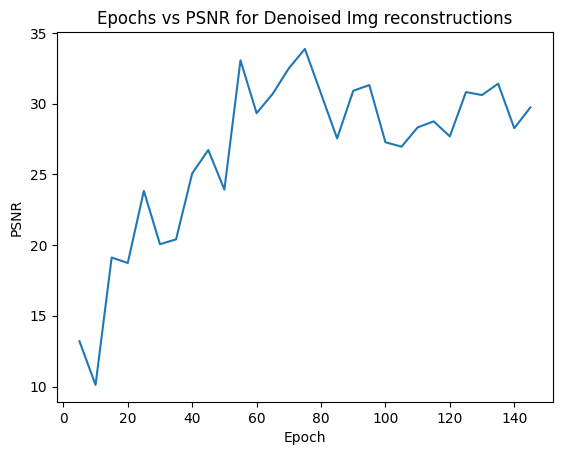

In [ ]:
plt.plot(epochs, psnrs)
plt.xlabel('Epoch')
plt.ylabel('PSNR')
plt.title('Epochs vs PSNR for Denoised Img reconstructions')
plt.show()

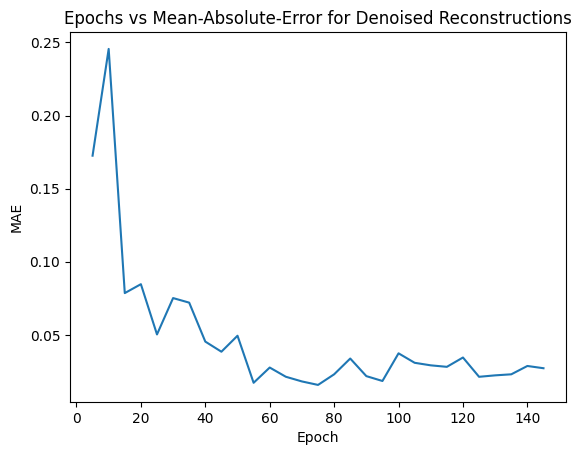

In [ ]:
plt.plot(epochs, maes)
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Epochs vs Mean-Absolute-Error for Denoised Reconstructions')
plt.show()

## Testing and Reproducting results

In [ ]:
training_done = False

In [ ]:
!cp /content/checkpoints/new_train/weights_reconstruct.pth ./checkpoints/new_test/weights_reconstruct.pth
!cp /content/checkpoints/new_train/optimizer_reconstruct.pth ./checkpoints/new_test/optimizer_reconstruct.pth
!cp /content/checkpoints/new_train/weights_reconstruct_dis.pth ./checkpoints/new_test/weights_reconstruct_dis.pth

training_done = True

> Pretrained Model

In [ ]:
# import urllib.request

# urllib.request.urlretrieve("https://drive.google.com/u/1/uc?id=1KLvPdNpskdVDSz0qEIP_tn-j2MwTcJAV&export=download", "./checkpoints/test_example/weights_reconstruct.pth")

In [ ]:
!python test.py --model 1 --checkpoints ./checkpoints/new_test

Using cache found in /root/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master
Using cache found in /root/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master
[]
Loading reconstruct weights...
Loading reconstruct complete! weights...

start testing...

PSNR_RGB: tensor(10.8809, device='cuda:0')
PSNR_RGB: tensor(10.9718, device='cuda:0')
PSNR_RGB: tensor(10.6053, device='cuda:0')
PSNR_RGB: tensor(11.2612, device='cuda:0')
PSNR_RGB: tensor(11.5175, device='cuda:0')
PSNR_RGB: tensor(11.1280, device='cuda:0')
PSNR_RGB: tensor(11.0260, device='cuda:0')
PSNR_RGB: tensor(11.4674, device='cuda:0')
PSNR_RGB: tensor(10.8985, device='cuda:0')
PSNR_RGB: tensor(11.6362, device='cuda:0')
PSNR_RGB: tensor(11.0568, device='cuda:0')
PSNR_RGB: tensor(11.0107, device='cuda:0')
PSNR_RGB: tensor(11.4843, device='cuda:0')
PSNR_RGB: tensor(11.3770, device='cuda:0')
PSNR_RGB: tensor(11.0672, device='cuda:0')
PSNR_RGB: tensor(10.3354, device='cuda:0')
PSNR_RGB: tensor(11.2300, device='cuda:0')
PSN

In [ ]:
!zip -r /content/checkpoints/new_test/test_results.zip /content/checkpoints/new_test/results/reconstruct/

In [ ]:
# from google.colab import files
# files.download('/content/checkpoints/test_example/test_results.zip') 

### Performance

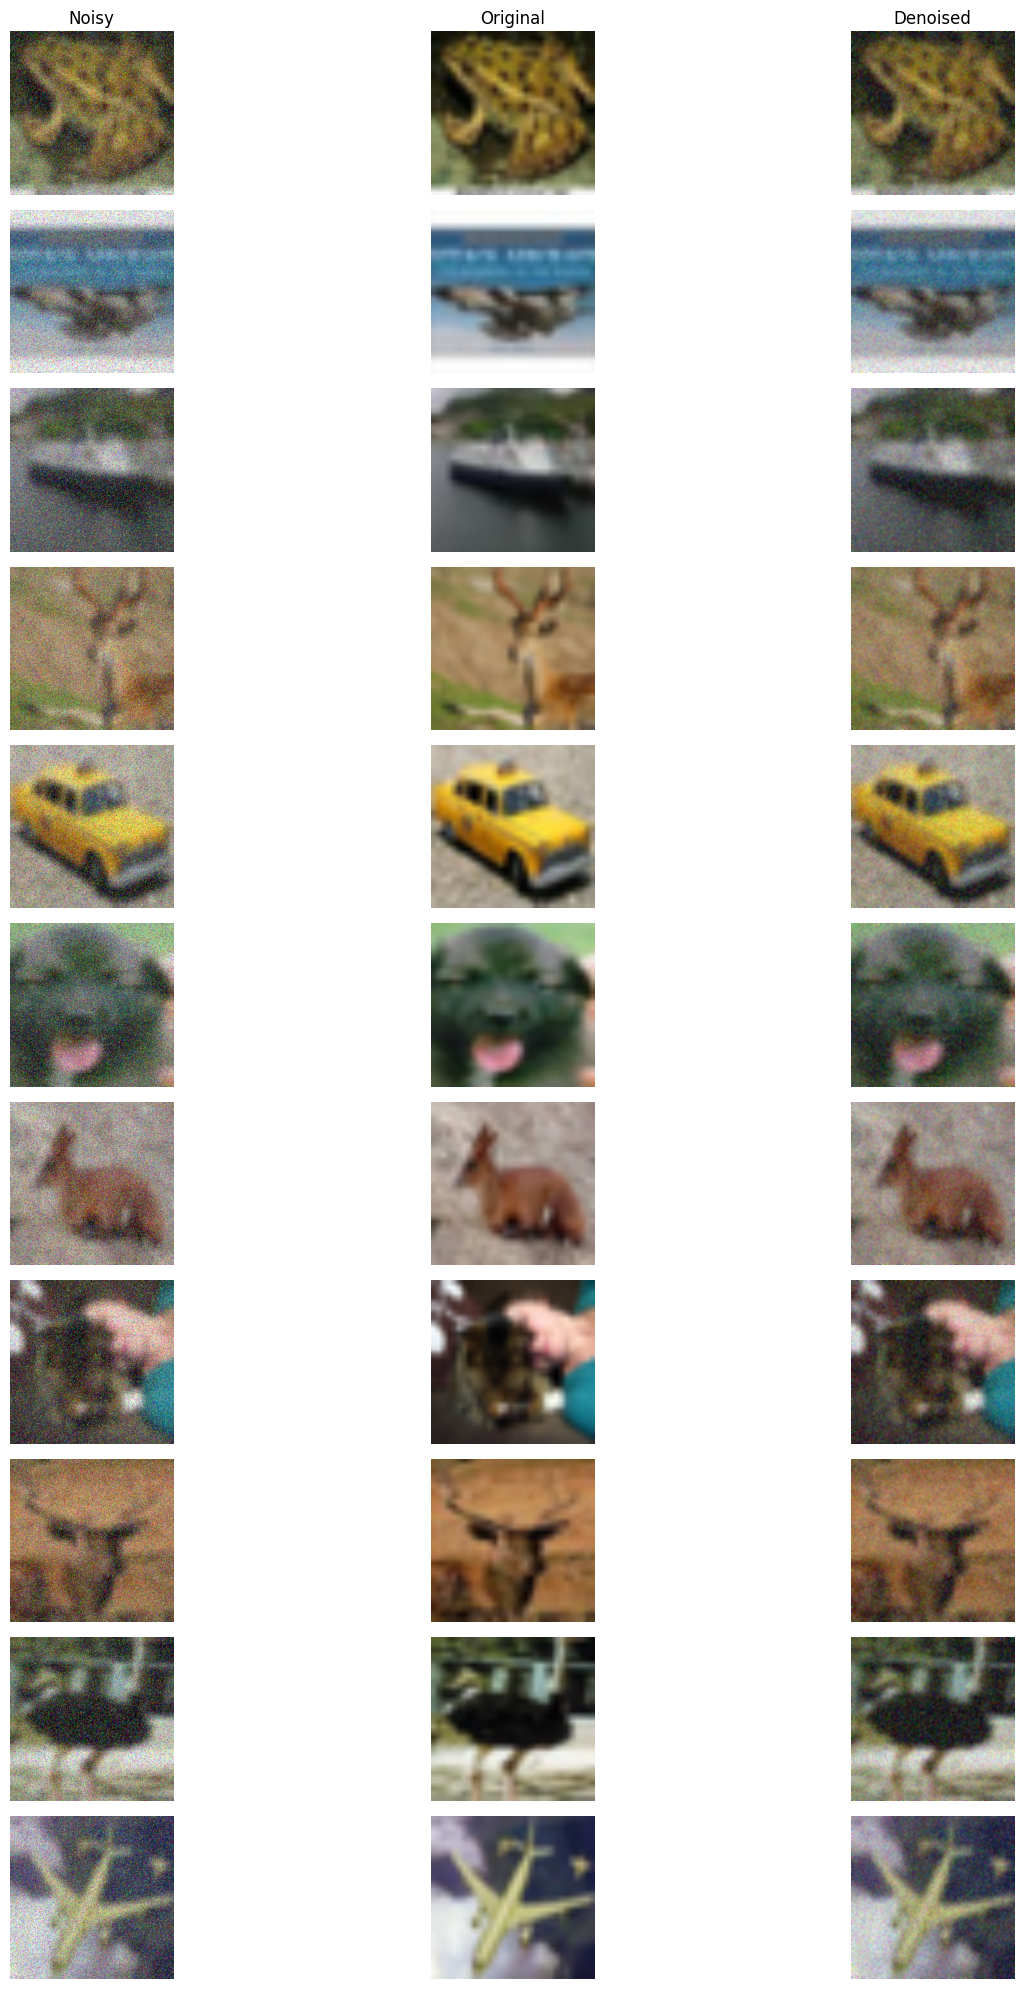

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

hazy_dir = '/content/dataset_downloads/new_methodology/cifar10_gray/test'
original_dir = '/content/dataset_downloads/new_methodology/cifar10_orig/test'
predicted_dir = '/content/checkpoints/new_test/results/reconstruct'


hazy_files = os.listdir(hazy_dir)
hazy_paths = {}
for file in hazy_files:
    if file.endswith('.png') or file.endswith('.jpg'):
        key = file.split('.')[0]
        hazy_paths[key] = os.path.join(hazy_dir, file)


original_files = os.listdir(original_dir)
original_paths = {}
for file in original_files:
    if file.endswith('.png') or file.endswith('.jpg'):
        key = file.split('.')[0]
        original_paths[key] = os.path.join(original_dir, file)


predicted_files = os.listdir(predicted_dir)
predicted_paths = {}
for file in predicted_files:
    if file.endswith('.png') or file.endswith('.jpg'):
        key = file.split('.')[0]
        predicted_paths[key] = os.path.join(predicted_dir, file)

num_rows = 10
fig, axs = plt.subplots(num_rows+1, 3, figsize=(15, 20))


for i, key in enumerate(original_paths.keys()):
    hazy_img = plt.imread(hazy_paths[key])
    original_img = plt.imread(original_paths[key])
    Image.open(predicted_paths[key]).filter(ImageFilter.BLUR).save(predicted_paths[key])
    predicted_img = plt.imread(predicted_paths[key])
    
    
    axs[i, 0].imshow(hazy_img)
    axs[i, 0].axis('off')

    axs[i, 1].imshow(original_img)
    axs[i, 1].axis('off')
    
    axs[i, 2].imshow(predicted_img)
    axs[i, 2].axis('off')
    if(i==num_rows):
        break

axs[0, 0].set_title("Noisy")
axs[0, 1].set_title("Original")
axs[0, 2].set_title('Denoised')

fig.tight_layout()
plt.show()

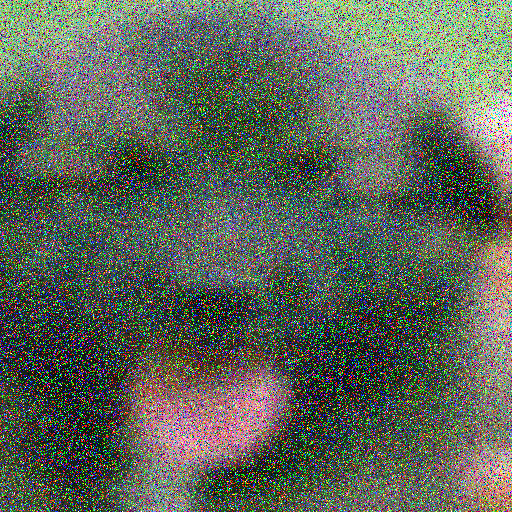

In [ ]:
Image.open(hazy_paths['1401']).show()

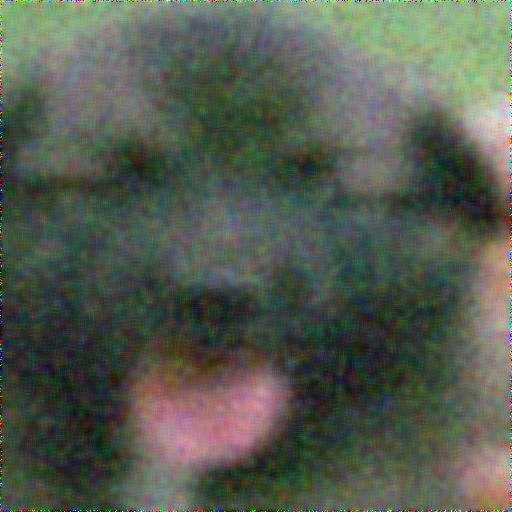

In [ ]:
Image.open(predicted_paths['1401']).show()

# Trying methodology for Image Colorization

## Creating Dataset

In [ ]:
import os
import numpy as np
from PIL import Image
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms

orig_folder = '/content/dataset_downloads/new_methodology/cifar10_orig'
gray_folder = '/content/dataset_downloads/new_methodology/cifar10_gray'

if not os.path.exists(orig_folder):
    os.makedirs(orig_folder)
    os.makedirs(orig_folder+'/train')
    os.makedirs(orig_folder+'/test')
if not os.path.exists(gray_folder):
    os.makedirs(gray_folder)
    os.makedirs(gray_folder+'/train')
    os.makedirs(gray_folder+'/test')

pil_transform = transforms.Compose([transforms.ToPILImage()])
resizer = transforms.Compose([transforms.ToTensor(), transforms.Resize((512, 512))])

def add_saltNpepper_noise(input, weight = 0.25):
    input = transforms.ToTensor()(input)
    size_noise = 3*512*512
    count_2 = int(weight/2 * size_noise)
    noise = np.array(
        [-255]*count_2 + [0]*(size_noise - 2 * count_2) + [255]*count_2
    )
    np.random.shuffle(noise)
    noise = torch.from_numpy(noise)
    noise = torch.reshape(noise, (3, 512, 512))
    noisy_img = input + noise
    noisy_img = torch.clip(noisy_img,0,255)
    img = resizer(pil_transform(noisy_img))
    return noisy_img

def to_grayscale(img):
    img = transforms.functional.to_grayscale(img, num_output_channels=3)
    # img = transforms.ToTensor()(img)
    img = resizer(img)
    img = transforms.functional.convert_image_dtype(img, dtype=torch.float32)
    # img = transforms.functional.lab2rgb(torch.stack([img, torch.zeros_like(img), torch.zeros_like(img)], dim=0)).numpy()
    
    img = (img * 255)
    # print(img.shape)
    return img

cifar10 = datasets.CIFAR10(root='./data', train=True, download=True)

for i in range(1000):
    orig_img = cifar10[i][0]
    orig_img = resizer(orig_img)
    orig_img = pil_transform(orig_img)
    orig_path = os.path.join(orig_folder+'/train', f'{i}.png')
    orig_img.save(orig_path)
    
    # convert the original CIFAR10 image to grayscale and save it to the grayscale folder
    # tensor = transform(orig_img)
    gray_img = add_saltNpepper_noise(orig_img)
    gray_path = os.path.join(gray_folder+'/train', f'{i}.png')
    Image.fromarray(gray_img.numpy().astype(np.uint8).transpose(1, 2, 0)).save(gray_path)
for i in range(1000, 1500):
    orig_img = cifar10[i][0]
    orig_img = resizer(orig_img)
    orig_img = pil_transform(orig_img)
    orig_path = os.path.join(orig_folder+'/test', f'{i}.png')
    orig_img.save(orig_path)
    
    # convert the original CIFAR10 image to grayscale and save it to the grayscale folder
    # tensor = transform(orig_img)
    gray_img = add_saltNpepper_noise(orig_img)
    gray_path = os.path.join(gray_folder+'/test', f'{i}.png')
    Image.fromarray(gray_img.numpy().astype(np.uint8).transpose(1, 2, 0)).save(gray_path)

> training dataset

In [ ]:
!python scripts/flist.py --path /content/dataset_downloads/new_methodology/cifar10_gray/train --output ./datasets/cifar_train_bw.flist
!python scripts/flist.py --path /content/dataset_downloads/new_methodology/cifar10_orig/train --output ./datasets/cifar_train_col.flist

loading /content/dataset_downloads/new_methodology/cifar10_gray/train
loading /content/dataset_downloads/new_methodology/cifar10_orig/train


> testing dataset

In [ ]:
!python scripts/flist.py --path /content/dataset_downloads/new_methodology/cifar10_gray/test --output ./datasets/cifar_test_bw.flist

loading /content/dataset_downloads/new_methodology/cifar10_gray/test


## Training

In [ ]:
!pip install kornia

In [ ]:
!python train.py --model 1 --checkpoints ./checkpoints/new_train

Using cache found in /root/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master
Using cache found in /root/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master
['/content/dataset_downloads/new_methodology/cifar10_orig/train/0.png'
 '/content/dataset_downloads/new_methodology/cifar10_orig/train/1.png'
 '/content/dataset_downloads/new_methodology/cifar10_orig/train/10.png'
 '/content/dataset_downloads/new_methodology/cifar10_orig/train/100.png'
 '/content/dataset_downloads/new_methodology/cifar10_orig/train/101.png'
 '/content/dataset_downloads/new_methodology/cifar10_orig/train/102.png'
 '/content/dataset_downloads/new_methodology/cifar10_orig/train/103.png'
 '/content/dataset_downloads/new_methodology/cifar10_orig/train/104.png'
 '/content/dataset_downloads/new_methodology/cifar10_orig/train/105.png'
 '/content/dataset_downloads/new_methodology/cifar10_orig/train/106.png'
 '/content/dataset_downloads/new_methodology/cifar10_orig/train/107.png'
 '/content/dataset_downloads/n

In [ ]:
!zip -r /content/checkpoints/new_train/train_results.zip /content/checkpoints/new_train/

In [ ]:
# from google.colab import files
# files.download('/content/checkpoints/new_train/train_results.zip') 

#### Metric Curves across epochs

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('/content/checkpoints/new_train/log_reconstruct.dat')

epochs = data[:, 1]
psnrs = data[:, -2]
maes = data[:, -1]


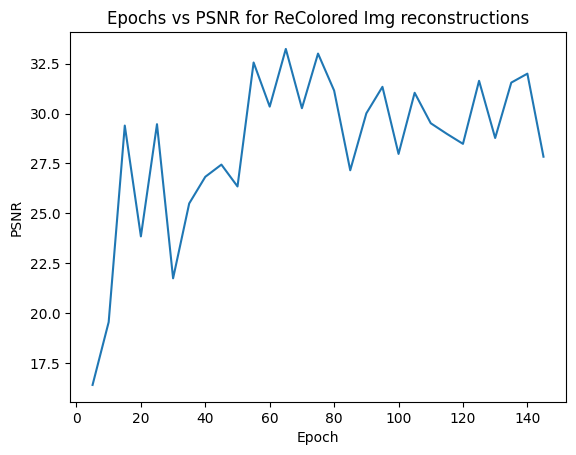

In [ ]:
plt.plot(epochs, psnrs)
plt.xlabel('Epoch')
plt.ylabel('PSNR')
plt.title('Epochs vs PSNR for ReColored Img reconstructions')
plt.show()

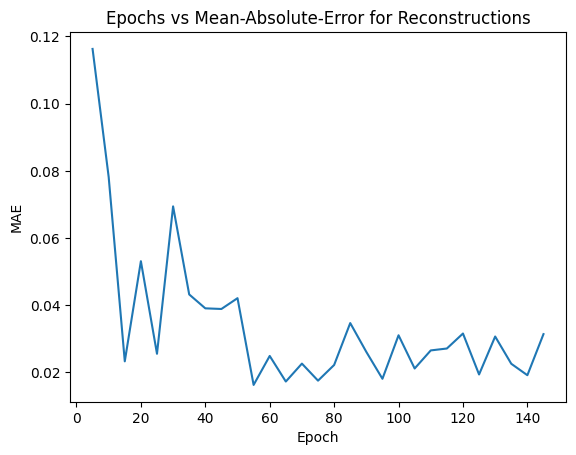

In [ ]:
plt.plot(epochs, maes)
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Epochs vs Mean-Absolute-Error for Reconstructions')
plt.show()

## Testing and Reproducting results

In [ ]:
training_done = False

In [ ]:
!cp /content/checkpoints/new_train/weights_reconstruct.pth ./checkpoints/new_test/weights_reconstruct.pth
!cp /content/checkpoints/new_train/optimizer_reconstruct.pth ./checkpoints/new_test/optimizer_reconstruct.pth
!cp /content/checkpoints/new_train/weights_reconstruct_dis.pth ./checkpoints/new_test/weights_reconstruct_dis.pth

training_done = True

> Pretrained Model

In [ ]:
# import urllib.request

# urllib.request.urlretrieve("https://drive.google.com/u/1/uc?id=1KLvPdNpskdVDSz0qEIP_tn-j2MwTcJAV&export=download", "./checkpoints/test_example/weights_reconstruct.pth")

In [ ]:
!python test.py --model 1 --checkpoints ./checkpoints/new_test

Using cache found in /root/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master
Using cache found in /root/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master
[]
Loading reconstruct weights...
Loading reconstruct complete! weights...

start testing...

PSNR_RGB: tensor(19.9941, device='cuda:0')
PSNR_RGB: tensor(18.8566, device='cuda:0')
PSNR_RGB: tensor(17.0210, device='cuda:0')
PSNR_RGB: tensor(18.5400, device='cuda:0')
PSNR_RGB: tensor(19.5566, device='cuda:0')
PSNR_RGB: tensor(15.3457, device='cuda:0')
PSNR_RGB: tensor(17.4968, device='cuda:0')
PSNR_RGB: tensor(19.8309, device='cuda:0')
PSNR_RGB: tensor(20.5003, device='cuda:0')
PSNR_RGB: tensor(20.5524, device='cuda:0')
PSNR_RGB: tensor(17.3123, device='cuda:0')
PSNR_RGB: tensor(15.7734, device='cuda:0')
PSNR_RGB: tensor(20.0680, device='cuda:0')
PSNR_RGB: tensor(17.5422, device='cuda:0')
PSNR_RGB: tensor(18.6728, device='cuda:0')
PSNR_RGB: tensor(22.4745, device='cuda:0')
PSNR_RGB: tensor(19.1925, device='cuda:0')
PSN

In [ ]:
!zip -r /content/checkpoints/new_test/test_results.zip /content/checkpoints/new_test/results/reconstruct/

In [ ]:
# from google.colab import files
# files.download('/content/checkpoints/test_example/test_results.zip') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Performance

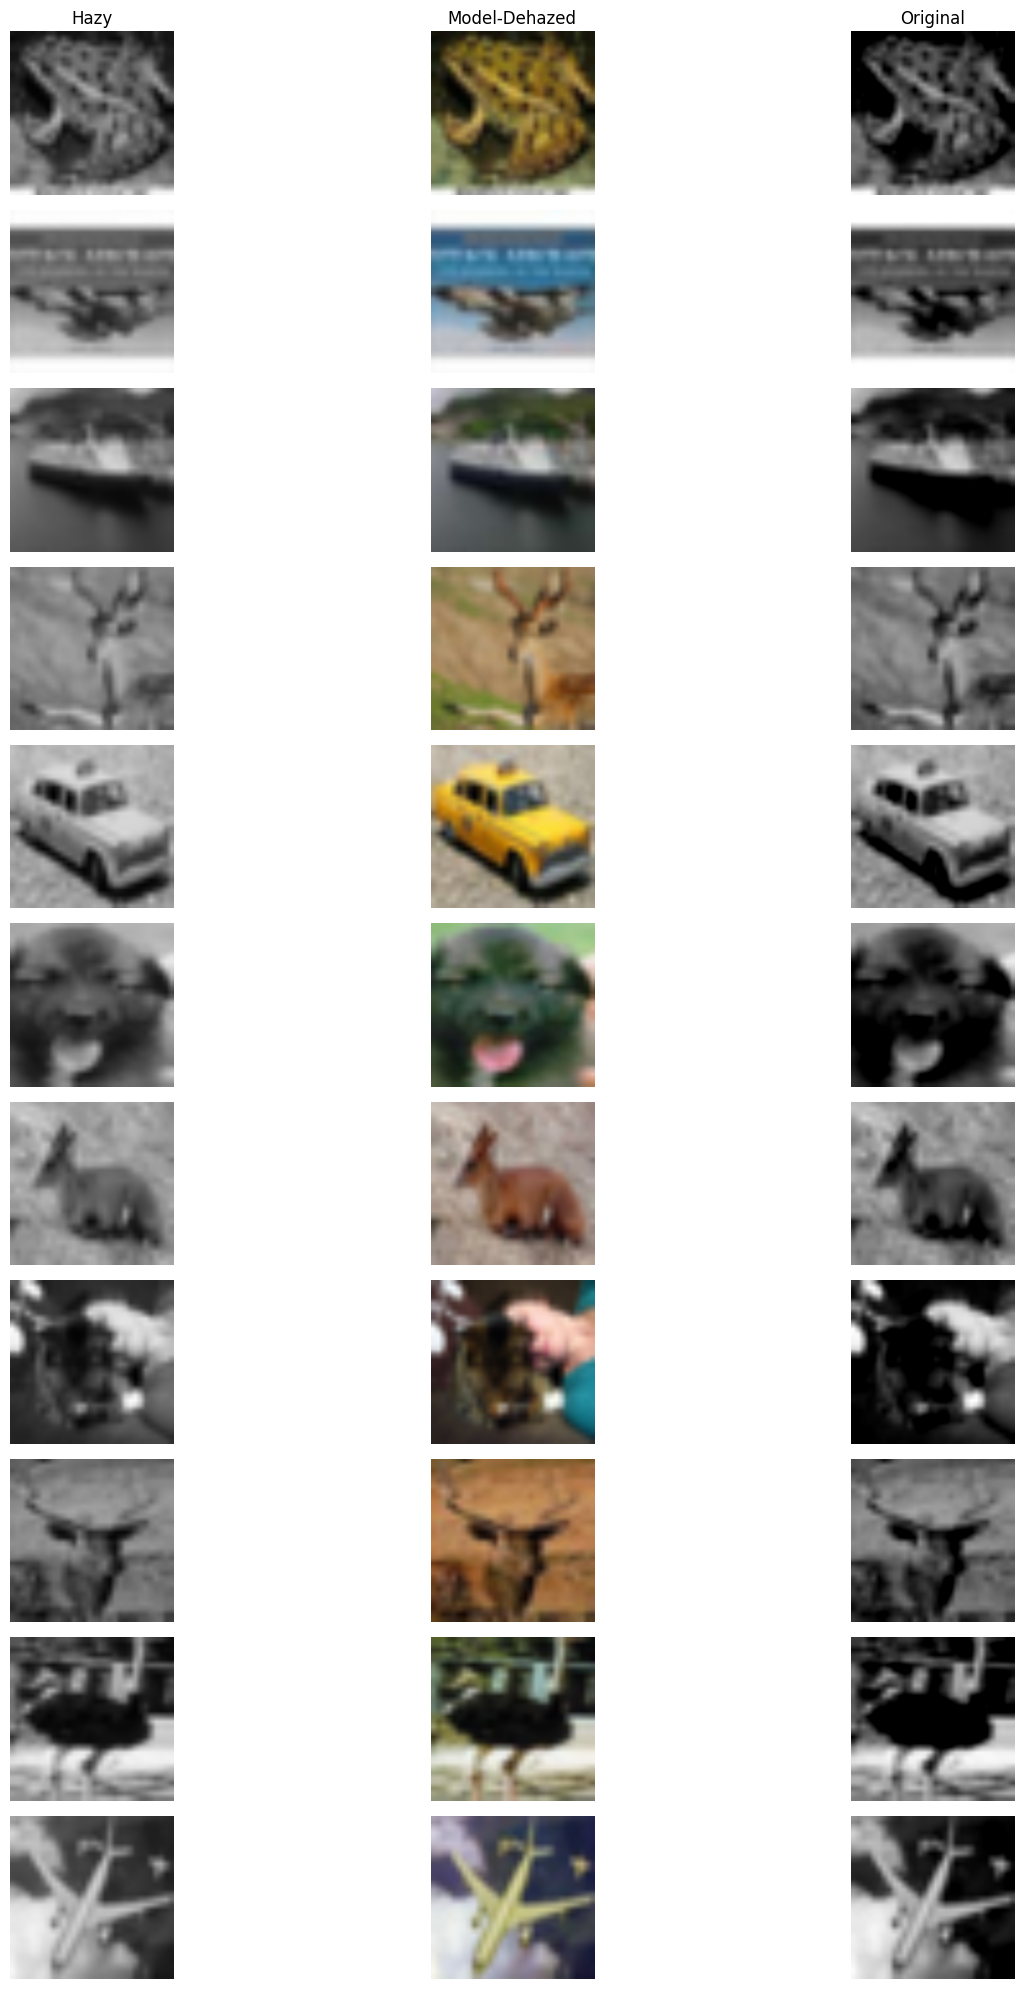

In [ ]:
import os
import matplotlib.pyplot as plt

hazy_dir = '/content/dataset_downloads/new_methodology/cifar10_gray/test'
original_dir = '/content/dataset_downloads/new_methodology/cifar10_orig/test'
predicted_dir = '/content/checkpoints/new_test/results/reconstruct'


hazy_files = os.listdir(hazy_dir)
hazy_paths = {}
for file in hazy_files:
    if file.endswith('.png') or file.endswith('.jpg'):
        key = file.split('.')[0]
        hazy_paths[key] = os.path.join(hazy_dir, file)


original_files = os.listdir(original_dir)
original_paths = {}
for file in original_files:
    if file.endswith('.png') or file.endswith('.jpg'):
        key = file.split('.')[0]
        original_paths[key] = os.path.join(original_dir, file)


predicted_files = os.listdir(predicted_dir)
predicted_paths = {}
for file in predicted_files:
    if file.endswith('.png') or file.endswith('.jpg'):
        key = file.split('.')[0]
        predicted_paths[key] = os.path.join(predicted_dir, file)

num_rows = 10
fig, axs = plt.subplots(num_rows+1, 3, figsize=(15, 20))

for i, key in enumerate(original_paths.keys()):
    hazy_img = plt.imread(hazy_paths[key])
    original_img = plt.imread(original_paths[key])
    predicted_img = plt.imread(predicted_paths[key])
    
    
    axs[i, 0].imshow(hazy_img)
    axs[i, 0].axis('off')

    axs[i, 1].imshow(original_img)
    axs[i, 1].axis('off')
    
    axs[i, 2].imshow(predicted_img)
    axs[i, 2].axis('off')
    if(i==num_rows):
        break

axs[0, 0].set_title("Hazy")
axs[0, 1].set_title("Model-Dehazed")
axs[0, 2].set_title('Original')

fig.tight_layout()
plt.show()
